In [331]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [332]:
i = 0
sources = ['spotify_charts','galgalatz']
source = sources[i]

In [333]:
df = pd.read_csv(f'./collection/{source}_songs.csv')

In [334]:
df["weeks_cols"] = df['weeks'].str[1:-1].replace("'","").str.split(", ")
df_exp = df.explode("weeks_cols")
df_exp["weeks_cols"] = pd.to_datetime(df_exp['weeks_cols'], infer_datetime_format=True)


In [335]:
df_exp.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000,19244.000000
mean,0.650137,0.566592,5.517772,-6.975537,0.407296,0.085119,0.353797,0.010014,0.177439,0.466695,118.705274
std,0.133369,0.150616,3.689791,2.210103,0.491344,0.088128,0.272078,0.060872,0.150168,0.201944,26.069927
min,0.153000,0.056100,0.000000,-23.023000,0.000000,0.023200,0.000248,0.000000,0.031100,0.032000,53.437000
25%,0.568000,0.452000,2.000000,-8.208000,0.000000,0.035700,0.104000,0.000000,0.096200,0.316000,97.998000
50%,0.660000,0.564000,6.000000,-6.819000,0.000000,0.048600,0.321000,0.000000,0.122000,0.448000,120.044000
75%,0.750000,0.676000,9.000000,-5.439000,1.000000,0.089000,0.585000,0.000009,0.199000,0.614000,136.037000
max,0.939000,0.955000,11.000000,-1.434000,1.000000,0.529000,0.978000,0.886000,0.978000,0.969000,205.272000


In [336]:
df_stats = df_exp.groupby("weeks_cols").mean()
df_stats.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
weeks_cols,,,,,,,,,,,
2019-03-08,0.668155,0.608230,5.593583,-6.419610,0.422460,0.089709,0.300023,0.009873,0.159753,0.467529,119.087481
2019-03-15,0.669656,0.601753,5.510753,-6.491667,0.430108,0.087449,0.304665,0.008759,0.160553,0.474473,119.123199
2019-03-22,0.667290,0.599849,5.489247,-6.468253,0.430108,0.088551,0.309473,0.008758,0.159495,0.473876,119.267478
2019-03-29,0.668608,0.581146,5.489247,-6.931140,0.435484,0.093938,0.330387,0.016320,0.166507,0.469420,119.448511
2019-04-05,0.671588,0.584305,5.379679,-6.867070,0.427807,0.095907,0.319678,0.015699,0.171645,0.470319,118.672861


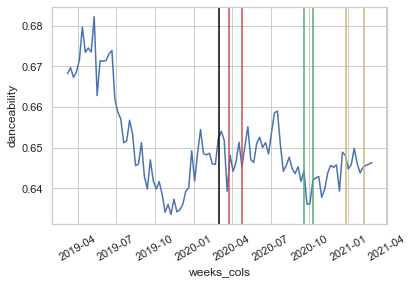

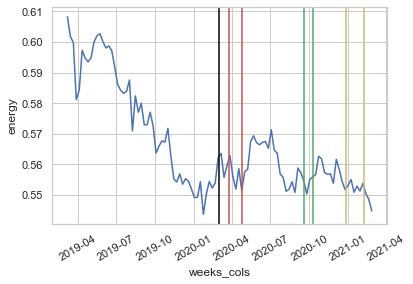

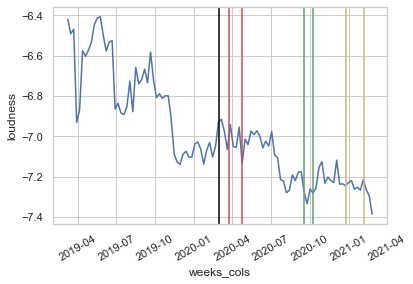

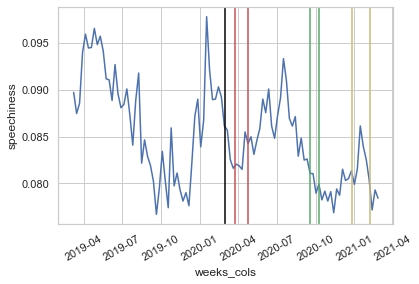

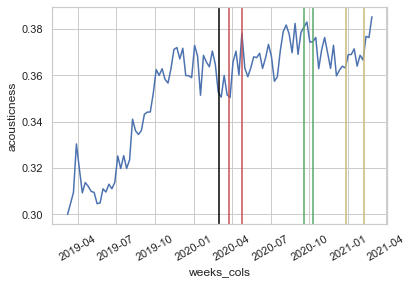

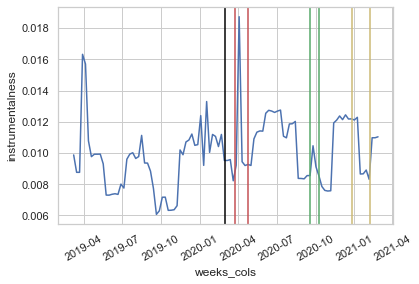

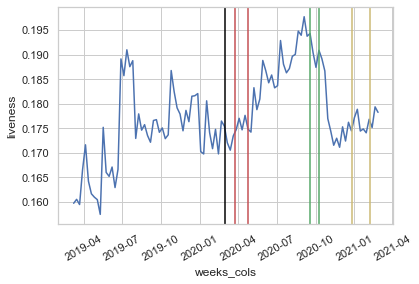

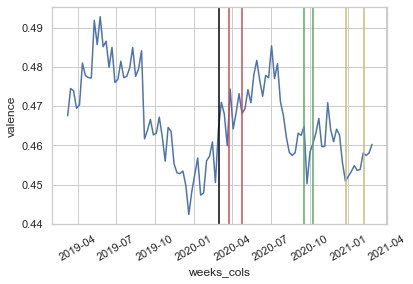

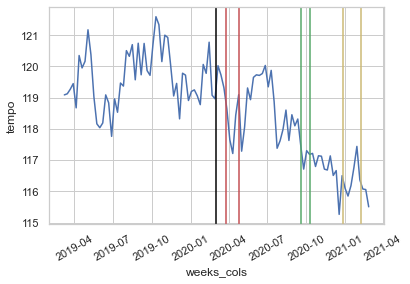

In [337]:
audio_features = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

START_LOCKDOWN1 = '2020-03-25'
END_LOCKDOWN1 = '2020-04-24'
START_LOCKDOWN2 = '2020-09-18'
END_LOCKDOWN2 = '2020-10-10'
START_LOCKDOWN3 = '2020-12-27'
END_LOCKDOWN3 = '2021-02-07'
START_COVID19 = '2020-03-01'

date_format = "%Y-%m-%d"

covid_start = datetime.strptime(START_COVID19, date_format)
l1_start = datetime.strptime(START_LOCKDOWN1, date_format)
l1_end = datetime.strptime(END_LOCKDOWN1, date_format)
l2_start = datetime.strptime(START_LOCKDOWN2, date_format)
l2_end = datetime.strptime(END_LOCKDOWN2, date_format)
l3_start = datetime.strptime(START_LOCKDOWN3, date_format)
l3_end = datetime.strptime(END_LOCKDOWN3, date_format)


for i in range(len(audio_features)):
    feature = audio_features[i]

    sns.set_theme(style="whitegrid")
    g = sns.lineplot(x="weeks_cols", y=feature, data=df_stats)
    plt.xticks(rotation=30)

    # covid
    plt.axvline(covid_start, c="black")
    
    # First Lockdown
    plt.axvline(l1_start, c="r")
    plt.axvline(l1_end, c="r")

    # Second Lockdown
    plt.axvline(l2_start, c="g")
    plt.axvline(l2_end, c="g")

    # Third Lockdown
    plt.axvline(l3_start, c="y")
    plt.axvline(l3_end, c="y")

    plt.show()

In [338]:
df_stats.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.777122,0.171899,0.662477,0.145609,0.778012,-0.807456,0.073098,-0.507761,0.674262,0.174179
energy,0.777122,1.000000,0.301311,0.908288,0.056335,0.532231,-0.945044,-0.230789,-0.460486,0.757896,0.404919
key,0.171899,0.301311,1.000000,0.402081,-0.551634,0.317288,-0.202830,-0.147771,-0.006557,0.311189,0.572103
loudness,0.662477,0.908288,0.402081,1.000000,0.001972,0.486833,-0.885007,-0.326127,-0.579575,0.651838,0.605205
mode,0.145609,0.056335,-0.551634,0.001972,1.000000,0.089273,-0.190995,0.113924,-0.257280,-0.062082,-0.172882
speechiness,0.778012,0.532231,0.317288,0.486833,0.089273,1.000000,-0.594697,0.195981,-0.264344,0.455064,0.371147
acousticness,-0.807456,-0.945044,-0.202830,-0.885007,-0.190995,-0.594697,1.000000,0.186823,0.543152,-0.642774,-0.369849
instrumentalness,0.073098,-0.230789,-0.147771,-0.326127,0.113924,0.195981,0.186823,1.000000,0.036606,-0.086079,-0.176661
liveness,-0.507761,-0.460486,-0.006557,-0.579575,-0.257280,-0.264344,0.543152,0.036606,1.000000,-0.197273,-0.202170
valence,0.674262,0.757896,0.311189,0.651838,-0.062082,0.455064,-0.642774,-0.086079,-0.197273,1.000000,0.320627


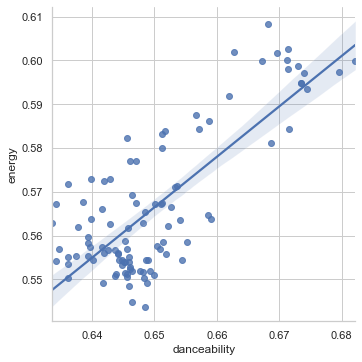

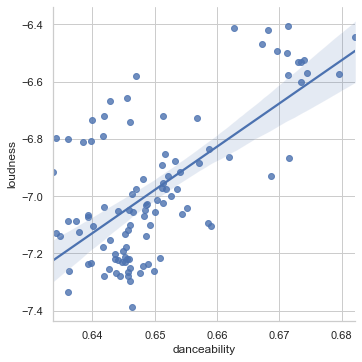

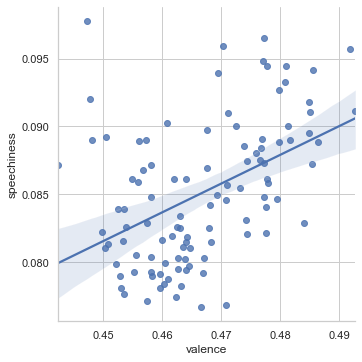

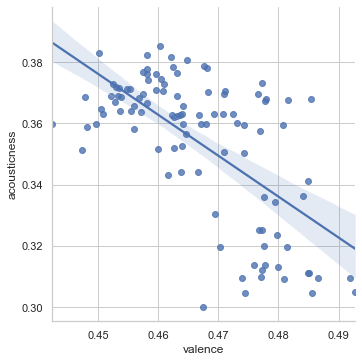

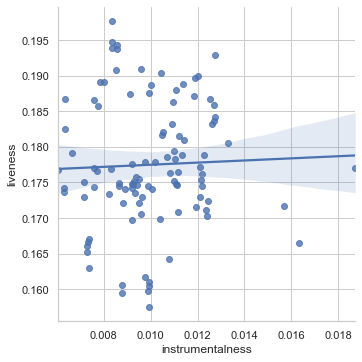

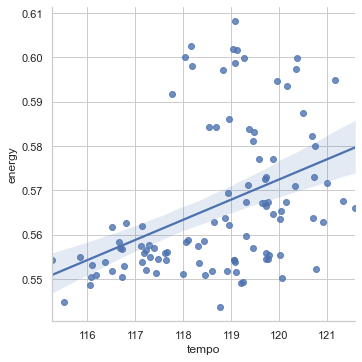

In [339]:
pairs = [('danceability','energy'),('danceability','loudness'),('valence','speechiness'),('valence','acousticness'),('instrumentalness','liveness'),('tempo','energy')]

for (a,b) in pairs:
    sns.lmplot(x=a, y=b, data=df_stats)

In [340]:
df_stats.to_csv(f'{source}_weeks_data.csv')

In [341]:
df_stats.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
weeks_cols,,,,,,,,,,,
2019-03-08,0.668155,0.608230,5.593583,-6.419610,0.422460,0.089709,0.300023,0.009873,0.159753,0.467529,119.087481
2019-03-15,0.669656,0.601753,5.510753,-6.491667,0.430108,0.087449,0.304665,0.008759,0.160553,0.474473,119.123199
2019-03-22,0.667290,0.599849,5.489247,-6.468253,0.430108,0.088551,0.309473,0.008758,0.159495,0.473876,119.267478
2019-03-29,0.668608,0.581146,5.489247,-6.931140,0.435484,0.093938,0.330387,0.016320,0.166507,0.469420,119.448511
2019-04-05,0.671588,0.584305,5.379679,-6.867070,0.427807,0.095907,0.319678,0.015699,0.171645,0.470319,118.672861


In [342]:
df2 = pd.read_csv(f'./collection/{source}_weeks_to_lockdown.csv',index_col=0)
df2.head()

,lockdown,is_covid19
weeks_cols,,
2019-03-08,0,0
2019-03-15,0,0
2019-03-22,0,0
2019-03-29,0,0
2019-04-05,0,0


In [343]:
pd.to_datetime(df2.index, infer_datetime_format=True)

DatetimeIndex(['2019-03-08', '2019-03-15', '2019-03-22', '2019-03-29',
               '2019-04-05', '2019-04-12', '2019-04-19', '2019-04-26',
               '2019-05-03', '2019-05-10',
               ...
               '2020-12-25', '2021-01-01', '2021-01-08', '2021-01-15',
               '2021-01-22', '2021-01-29', '2021-02-05', '2021-02-12',
               '2021-02-19', '2021-02-26'],
              dtype='datetime64[ns]', name='weeks_cols', length=104, freq=None)

In [344]:
df2["weeks_cols"] = pd.to_datetime(df2.index, infer_datetime_format=True)
df2 = df2.set_index("weeks_cols")
merged = df_stats.join(df2)
merged.to_csv(f'{source}_weeks_data_with_lockdown.csv')
merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lockdown,is_covid19
weeks_cols,,,,,,,,,,,,,
2019-03-08,0.668155,0.608230,5.593583,-6.419610,0.422460,0.089709,0.300023,0.009873,0.159753,0.467529,119.087481,0,0
2019-03-15,0.669656,0.601753,5.510753,-6.491667,0.430108,0.087449,0.304665,0.008759,0.160553,0.474473,119.123199,0,0
2019-03-22,0.667290,0.599849,5.489247,-6.468253,0.430108,0.088551,0.309473,0.008758,0.159495,0.473876,119.267478,0,0
2019-03-29,0.668608,0.581146,5.489247,-6.931140,0.435484,0.093938,0.330387,0.016320,0.166507,0.469420,119.448511,0,0
2019-04-05,0.671588,0.584305,5.379679,-6.867070,0.427807,0.095907,0.319678,0.015699,0.171645,0.470319,118.672861,0,0


In [345]:
merged[merged['lockdown']==1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lockdown,is_covid19
weeks_cols,,,,,,,,,,,,,
2020-03-27,0.648164,0.562889,5.634921,-6.940735,0.428571,0.082054,0.350417,0.009215,0.174731,0.474345,118.638169,1,1
2020-04-03,0.644169,0.556048,5.592593,-7.050783,0.402116,0.081880,0.365701,0.018731,0.177031,0.464170,117.651836,1,1
2020-04-10,0.646484,0.551937,5.378947,-7.054516,0.415789,0.081495,0.370356,0.009437,0.174690,0.468254,117.211637,1,1
2020-04-17,0.651335,0.558607,5.575916,-6.954058,0.413613,0.085488,0.360086,0.009195,0.177636,0.473153,118.437743,1,1
